In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Station = Base.classes.station

Measurement = Base.classes.measurement

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(recent)

('2017-08-23',)


In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
pastyear = dt.date(2017,8,23) - dt.timedelta(days = 365)
prec = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > pastyear).\
order_by(Measurement.date).all()
prec[0]

('2016-08-24', 0.08)

In [21]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
measurement_df = pd.DataFrame(prec).set_index('date')
measurement_df = measurement_df.sort_index(ascending=True)
measurement_df = measurement_df.dropna()
measurement_df = measurement_df.rename(columns={"prcp":"precipitation"})
measurement_df.head()

,precipitation
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,1.22
2016-08-24,2.15


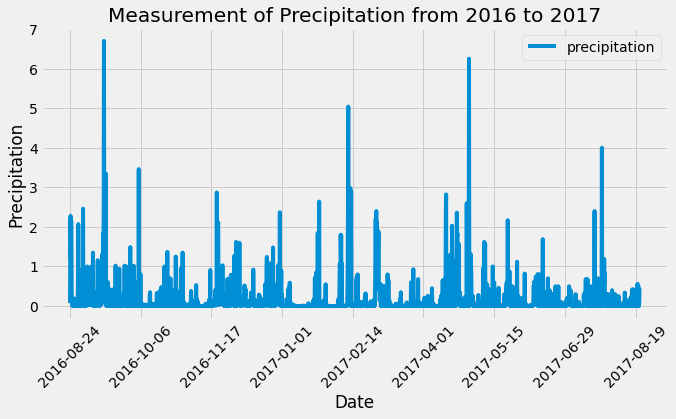

<Figure size 432x288 with 0 Axes>

In [36]:
# Use Pandas Plotting with Matplotlib to plot the data
measurement_df.plot(figsize = (10,5))
plt.title("Measurement of Precipitation from 2016 to 2017")
plt.ylabel("Precipitation")
plt.xlabel("Date")
plt.xticks(rotation = 45)
plt.show()
plt.savefig("Resources/measurement.png")

In [37]:
# Use Pandas to calcualte the summary statistics for the precipitation data
measurement_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [40]:
# Design a query to calculate the total number stations in the dataset
stationscount = session.query(Station).count()
stationscount

9

In [43]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
activestation = session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

activestation

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [44]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# The most active station was "USC00519281"
station = "USC00519281"
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == station).all()

[(54.0, 85.0, 71.66378066378067)]

In [45]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

pastyeartemp = session.query(Measurement.station, Measurement.date, Measurement.tobs).filter(Measurement.station == station).filter(Measurement.date > pastyear).order_by(Measurement.date).all()

active_df = pd.DataFrame(pastyeartemp)
active_df.head()

,station,date,tobs
0,USC00519281,2016-08-24,77.0
1,USC00519281,2016-08-25,80.0
2,USC00519281,2016-08-26,80.0
3,USC00519281,2016-08-27,75.0
4,USC00519281,2016-08-28,73.0


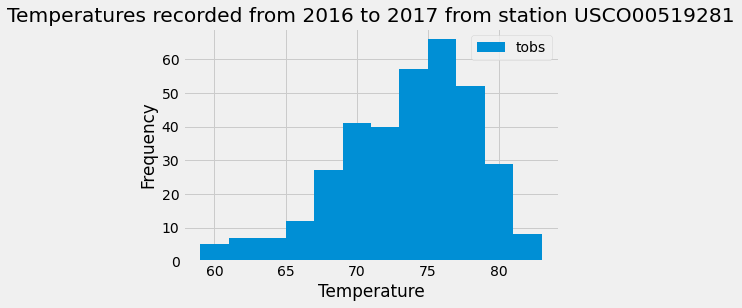

In [47]:
active_df.plot.hist(bins=12)
plt.xlabel("Temperature")
plt.title("Temperatures recorded from 2016 to 2017 from station USCO00519281")
plt.show()

# Close session

In [ ]:
# Close Session
session.close()